---
* ***ELGHAZI Soufiane***
---

<h1 style='color:purple' align='center'>TP 2 - Flight delay avec Pyspark</h1>

---

<h3 style='color:brown'>Installation et Importation des bibliothèques nécessaires</h3>


In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

<h3 style='color:brown'>Créer une session Spark</h3>


In [3]:
spark = SparkSession.builder.appName("FlightDelays").getOrCreate()

<h3 style='color:brown'>Définir le schéma</h3>


In [4]:
flight_schema = StructType([
    StructField("_id", StringType(), True),
    StructField("dofw", IntegerType(), True),
    StructField("carrier", StringType(), True),
    StructField("origin", StringType(), True),
    StructField("dest", StringType(), True),
    StructField("crsdephour", IntegerType(), True),
    StructField("crsdeptime", DoubleType(), True),
    StructField("depdelay", DoubleType(), True),
    StructField("crsarrtime", DoubleType(), True),
    StructField("arrdelay", DoubleType(), True),
    StructField("crselapsedtime", DoubleType(), True),
    StructField("dist", DoubleType(), True)
])

<h3 style='color:brown'>Charger les données</h3>


In [5]:
file_path = "flights20170102.json"
df = spark.read.format("json").option("inferSchema", "false").schema(flight_schema).load(file_path).cache()

<h3 style='color:brown'>Afficher les 10 premières lignes</h3>


In [6]:
df.show(10)

+--------------------+----+-------+------+----+----------+----------+--------+----------+--------+--------------+------+
|                 _id|dofw|carrier|origin|dest|crsdephour|crsdeptime|depdelay|crsarrtime|arrdelay|crselapsedtime|  dist|
+--------------------+----+-------+------+----+----------+----------+--------+----------+--------+--------------+------+
|AA_2017-01-01_ATL...|NULL|     AA|   ATL| LGA|        17|    1700.0|     0.0|    1912.0|     0.0|         132.0| 762.0|
|AA_2017-01-01_LGA...|NULL|     AA|   LGA| ATL|        13|    1343.0|     0.0|    1620.0|     0.0|         157.0| 762.0|
|AA_2017-01-01_MIA...|NULL|     AA|   MIA| ATL|         9|     939.0|     0.0|    1137.0|    10.0|         118.0| 594.0|
|AA_2017-01-01_ORD...|NULL|     AA|   ORD| MIA|        20|    2020.0|     0.0|      26.0|     0.0|         186.0|1197.0|
|AA_2017-01-01_LGA...|NULL|     AA|   LGA| MIA|         7|     700.0|     0.0|    1017.0|     0.0|         197.0|1096.0|
|AA_2017-01-01_ORD...|NULL|     

<h3 style='color:brown'>Filtrer les vols avec crsdephour égal à 10</h3>


In [7]:
df.filter(col("crsdephour") == 10).show(5)

+--------------------+----+-------+------+----+----------+----------+--------+----------+--------+--------------+------+
|                 _id|dofw|carrier|origin|dest|crsdephour|crsdeptime|depdelay|crsarrtime|arrdelay|crselapsedtime|  dist|
+--------------------+----+-------+------+----+----------+----------+--------+----------+--------+--------------+------+
|AA_2017-01-01_ORD...|NULL|     AA|   ORD| DEN|        10|    1005.0|     5.0|    1145.0|     3.0|         160.0| 888.0|
|AA_2017-01-01_MIA...|NULL|     AA|   MIA| ORD|        10|    1005.0|     4.0|    1231.0|     0.0|         206.0|1197.0|
|DL_2017-01-01_ORD...|NULL|     DL|   ORD| ATL|        10|    1000.0|     2.0|    1300.0|     0.0|         120.0| 606.0|
|DL_2017-01-01_DEN...|NULL|     DL|   DEN| ATL|        10|    1035.0|     4.0|    1524.0|     0.0|         169.0|1199.0|
|DL_2017-01-01_DEN...|NULL|     DL|   DEN| LGA|        10|    1045.0|     0.0|    1624.0|     0.0|         219.0|1620.0|
+--------------------+----+-----

<h3 style='color:brown'>Filtrer les vols avec crsdephour égal à 10 et depdelay non nul</h3>


In [8]:
df.filter((col("crsdephour") == 10) & (col("depdelay").isNotNull())).show(10)

+--------------------+----+-------+------+----+----------+----------+--------+----------+--------+--------------+------+
|                 _id|dofw|carrier|origin|dest|crsdephour|crsdeptime|depdelay|crsarrtime|arrdelay|crselapsedtime|  dist|
+--------------------+----+-------+------+----+----------+----------+--------+----------+--------+--------------+------+
|AA_2017-01-01_ORD...|NULL|     AA|   ORD| DEN|        10|    1005.0|     5.0|    1145.0|     3.0|         160.0| 888.0|
|AA_2017-01-01_MIA...|NULL|     AA|   MIA| ORD|        10|    1005.0|     4.0|    1231.0|     0.0|         206.0|1197.0|
|DL_2017-01-01_ORD...|NULL|     DL|   ORD| ATL|        10|    1000.0|     2.0|    1300.0|     0.0|         120.0| 606.0|
|DL_2017-01-01_DEN...|NULL|     DL|   DEN| ATL|        10|    1035.0|     4.0|    1524.0|     0.0|         169.0|1199.0|
|DL_2017-01-01_DEN...|NULL|     DL|   DEN| LGA|        10|    1045.0|     0.0|    1624.0|     0.0|         219.0|1620.0|
|DL_2017-01-01_ATL...|NULL|     

<h3 style='color:brown'> Regrouper par le transporteur (carrier) et afficher le nombre de vols pour chaque transporteur</h3>


In [9]:
df.groupBy("carrier").count().show()

+-------+-----+
|carrier|count|
+-------+-----+
|     UA|18873|
|     AA|10031|
|     DL|10055|
|     WN| 2389|
+-------+-----+



<h3 style='color:brown'> Regrouper par le transporteur et calculer le retard de départ maximum, minimum, et la somme des heures planifiées de départ</h3>


In [10]:
df.groupBy("carrier").agg(max("depdelay"), min("depdelay"), sum("crsdeptime")).show()

+-------+-------------+-------------+---------------+
|carrier|max(depdelay)|min(depdelay)|sum(crsdeptime)|
+-------+-------------+-------------+---------------+
|     UA|       1138.0|          0.0|    2.4267859E7|
|     AA|       1440.0|          0.0|    1.3226373E7|
|     DL|       1185.0|          0.0|    1.3318833E7|
|     WN|        375.0|          0.0|      3104545.0|
+-------+-------------+-------------+---------------+



<h3 style='color:brown'>Filtrer les vols avec arrdelay > 40 ou depdelay > 48, puis regrouper par la destination (dest) et afficher le nombre de vols pour chaque destination, trié par ordre décroissant
</h3>


In [11]:
df.filter((col("arrdelay") > 40) | (col("depdelay") > 48)).groupBy("dest").count().orderBy(desc("count")).show()

+----+-----+
|dest|count|
+----+-----+
| SFO|  901|
| EWR|  652|
| ORD|  619|
| LGA|  606|
| ATL|  555|
| DEN|  421|
| MIA|  393|
| BOS|  368|
| IAH|  340|
+----+-----+



<h3 style='color:brown'> Cacher le DataFrame en mémoire</h3>


In [12]:
df.cache()

DataFrame[_id: string, dofw: int, carrier: string, origin: string, dest: string, crsdephour: int, crsdeptime: double, depdelay: double, crsarrtime: double, arrdelay: double, crselapsedtime: double, dist: double]

<h3 style='color:brown'> Créer une vue temporaire pour Spark SQL</h3>


In [13]:
df.createOrReplaceTempView("flights")

<h3 style='color:brown'> Mettre en cache la table flights en mémoire en format colonne</h3>


In [14]:
spark.catalog.cacheTable("flights")

<h3 style='color:brown'> Utiliser Spark SQL pour effectuer une requête</h3>


In [15]:
spark.sql("SELECT carrier, origin, dest, depdelay, crsdephour, dist, dofw FROM flights WHERE depdelay > 40 ORDER BY depdelay DESC LIMIT 5").show()

+-------+------+----+--------+----------+------+----+
|carrier|origin|dest|depdelay|crsdephour|  dist|dofw|
+-------+------+----+--------+----------+------+----+
|     AA|   SFO| ORD|  1440.0|         8|1846.0|NULL|
|     DL|   BOS| ATL|  1185.0|        17| 946.0|NULL|
|     UA|   DEN| EWR|  1138.0|        12|1605.0|NULL|
|     DL|   ORD| ATL|  1087.0|        19| 606.0|NULL|
|     UA|   MIA| EWR|  1072.0|        20|1085.0|NULL|
+-------+------+----+--------+----------+------+----+



<h3 style='color:brown'> Effectuer la même requête en utilisant les transformations DataFrame</h3>


In [16]:
df.select("carrier", "origin", "dest", "depdelay", "crsdephour", "dist", "dofw").filter(col("depdelay") > 40).orderBy(desc("depdelay")).show(5)

+-------+------+----+--------+----------+------+----+
|carrier|origin|dest|depdelay|crsdephour|  dist|dofw|
+-------+------+----+--------+----------+------+----+
|     AA|   SFO| ORD|  1440.0|         8|1846.0|NULL|
|     DL|   BOS| ATL|  1185.0|        17| 946.0|NULL|
|     UA|   DEN| EWR|  1138.0|        12|1605.0|NULL|
|     DL|   ORD| ATL|  1087.0|        19| 606.0|NULL|
|     UA|   MIA| EWR|  1072.0|        20|1085.0|NULL|
+-------+------+----+--------+----------+------+----+
only showing top 5 rows



<h3 style='color:brown'> Calculer la moyenne du retard de départ pour chaque transporteur</h3>


In [17]:
df.groupBy("carrier").agg(avg("depdelay")).show()

+-------+------------------+
|carrier|     avg(depdelay)|
+-------+------------------+
|     UA|17.477878450696764|
|     AA| 10.45768118831622|
|     DL|15.316061660865241|
|     WN|13.491000418585182|
+-------+------------------+



<h3 style='color:brown'> Utiliser Spark SQL pour calculer la moyenne du retard de départ pour chaque transporteur
</h3>


In [18]:
spark.sql("SELECT carrier, AVG(depdelay) FROM flights GROUP BY carrier").show()

+-------+------------------+
|carrier|     avg(depdelay)|
+-------+------------------+
|     UA|17.477878450696764|
|     AA| 10.45768118831622|
|     DL|15.316061660865241|
|     WN|13.491000418585182|
+-------+------------------+



<h3 style='color:brown'> Afficher le résultat du regroupement par transporteur pour les vols avec un retard de départ supérieur à 48, trié par ordre décroissant du nombre de vols

</h3>


In [19]:
df.filter(col("depdelay") > 48).groupBy("carrier").count().orderBy(desc("count")).show(5)

+-------+-----+
|carrier|count|
+-------+-----+
|     UA| 2094|
|     DL|  911|
|     AA|  642|
|     WN|  201|
+-------+-----+



<h3 style='color:brown'>Utiliser Spark SQL pour afficher le nombre de vols pour chaque transporteur avec un retard de départ supérieur à 40

</h3>


In [20]:
spark.sql("SELECT carrier, COUNT(depdelay) FROM flights WHERE depdelay > 40 GROUP BY carrier").show()

+-------+---------------+
|carrier|count(depdelay)|
+-------+---------------+
|     UA|           2420|
|     AA|            757|
|     DL|           1043|
|     WN|            244|
+-------+---------------+



<h3 style='color:brown'> Utiliser Spark SQL pour afficher le nombre de vols pour chaque jour de la semaine avec un retard de départ supérieur à 40

</h3>


In [21]:
spark.sql("SELECT dofw, COUNT(depdelay) FROM flights WHERE depdelay > 40 GROUP BY dofw").show()

+----+---------------+
|dofw|count(depdelay)|
+----+---------------+
|NULL|           4464|
+----+---------------+



<h3 style='color:brown'> Utiliser Spark SQL pour afficher le nombre de vols pour chaque heure de départ planifiée avec un retard de départ supérieur à 48

</h3>


In [22]:
spark.sql("SELECT crsdephour, COUNT(depdelay) FROM flights WHERE depdelay > 48 GROUP BY crsdephour ORDER BY crsdephour").show()

+----------+---------------+
|crsdephour|count(depdelay)|
+----------+---------------+
|         0|              8|
|         1|              1|
|         5|             14|
|         6|             58|
|         7|             89|
|         8|            160|
|         9|            151|
|        10|            239|
|        11|            238|
|        12|            207|
|        13|            279|
|        14|            306|
|        15|            279|
|        16|            317|
|        17|            419|
|        18|            346|
|        19|            327|
|        20|            189|
|        21|            134|
|        22|             57|
+----------+---------------+
only showing top 20 rows



<h3 style='color:brown'> Utiliser Spark SQL pour afficher le nombre de vols pour chaque origine avec un retard de départ supérieur à 40, trié par ordre décroissant du nombre de vols

</h3>


In [23]:
spark.sql("SELECT origin, COUNT(depdelay) FROM flights WHERE depdelay > 40 GROUP BY origin ORDER BY COUNT(depdelay) DESC").show()

+------+---------------+
|origin|count(depdelay)|
+------+---------------+
|   ORD|            679|
|   ATL|            637|
|   SFO|            542|
|   EWR|            518|
|   DEN|            484|
|   IAH|            447|
|   LGA|            432|
|   MIA|            429|
|   BOS|            296|
+------+---------------+



<h3 style='color:brown'> Visualisations
</h3>


<h4 style='color:orange'>Visualisation : Bar plot de la moyenne du retard de départ par transporteur
</h4>


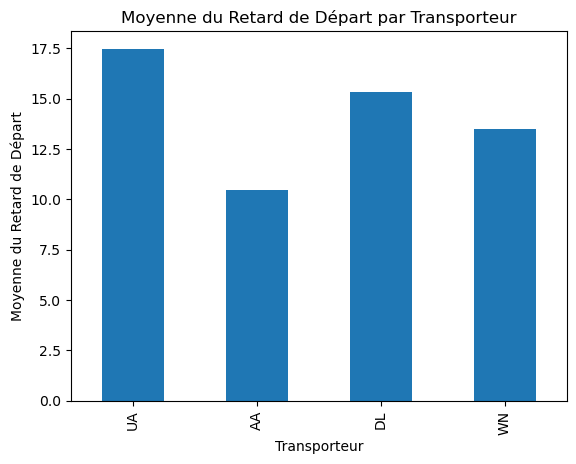

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
# Regrouper par le transporteur (carrier) et calculer la moyenne du retard de départ
avg_delay_per_carrier = df.groupBy("carrier").agg(avg("depdelay")).toPandas()
avg_delay_per_carrier.plot(kind='bar', x='carrier', y='avg(depdelay)', legend=False)
plt.title('Moyenne du Retard de Départ par Transporteur')
plt.xlabel('Transporteur')
plt.ylabel('Moyenne du Retard de Départ')
plt.show()

<h4 style='color:orange'>Visualisation : Histogramme du retard de départ pour les vols avec un retard de départ supérieur à 40
</h4>


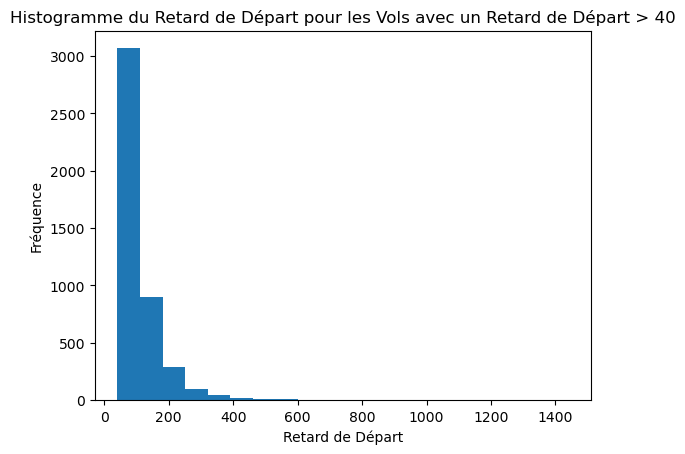

In [25]:
depdelay_over_40 = df.filter(col("depdelay") > 40).select("depdelay").toPandas()

depdelay_over_40.plot(kind='hist', bins=20, legend=False)
plt.title('Histogramme du Retard de Départ pour les Vols avec un Retard de Départ > 40')
plt.xlabel('Retard de Départ')
plt.ylabel('Fréquence')
plt.show()

<h4 style='color:orange'>Visualisation : Pie chart du nombre de vols par jour de la semaine avec un retard de départ supérieur à 40
</h4>


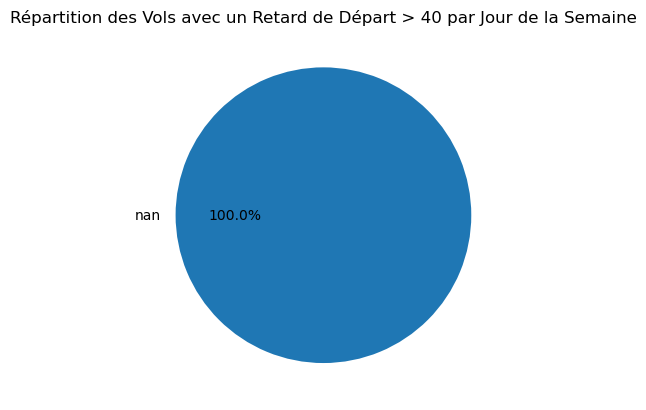

In [26]:
depdelay_per_dofw = df.filter(col("depdelay") > 40).groupBy("dofw").count().toPandas()

depdelay_per_dofw.plot(kind='pie', y='count', labels=depdelay_per_dofw['dofw'], autopct='%1.1f%%', legend=False)
plt.title('Répartition des Vols avec un Retard de Départ > 40 par Jour de la Semaine')
plt.ylabel('')
plt.show()


<h3 style='color:brown'> Arrêter la session Spark
</h3>


In [27]:
spark.stop()

<h2 style='color:purple' align='center'>Fin</h2>

---